In [2]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

Python 3.10.12


In [1]:
import os
import pandas as pd
import numpy as np

# Graphic tool
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rc("font", **{"size" : 12})

# --------------------------------------------------------------------------------------

from ssl_pysimutils import load_data, createDir

# --------------------------------------------------------------------------------------

# Data directory
DATA_PATH = os.path.join("..", "data")
OUTPUT_PATH = os.path.join("..", "output")

createDir(OUTPUT_PATH)

The directory '../output' already exists!


## Read the logs

In [2]:
# Loading data
t0, tf = 400, None
filename = "24_09_11__10_04_38.csv"
# filename = "24_09_11__10_48_44.csv"
# filename = "24_09_13__11_45_32.csv"

data = load_data(os.path.join(DATA_PATH, filename), t0, tf)

# Procressing the data
data_time = np.array(data["Time"].to_list())
data_x = np.array(data["NAVIGATION:pos_x"].to_list())
data_y = np.array(data["NAVIGATION:pos_y"].to_list())
data_phi = np.array(data["GVF:phi"].to_list())
data_omega_d = np.array(data["GVF:omega_d"].to_list())
data_omega = np.array(data["GVF:omega"].to_list())
data_n_norm = np.array(data["GVF:n_norm"].to_list())
data_t_norm = np.array(data["GVF:t_norm"].to_list())
data_ke = np.array(data["GVF:ke"].to_list())

data

,Time,UTC,GPS_lat(deg),GPS_long(deg),GVF:ke,GVF:s,GVF:omega,GVF:omega_d,GVF:t_norm,GVF:n_norm,...,NAVIGATION:block_time,NAVIGATION:flight_time,NAVIGATION:dist_home,NAVIGATION:pos_y,NAVIGATION:pos_x,NAVIGATION:cur_block,GPS:speed,ATTITUDE:theta,ATTITUDE:psi,ATTITUDE:phi
0,1592.819,08:31:10.819,37.297153,-3.683093,0.8,1,0.660534,0.136920,0.034960,0.041252,...,14,0,47.0,-36.2,-31.2,3,853,0.203475,-0.276357,0.064905
1,1593.069,08:31:11.069,37.297203,-3.683102,0.8,1,0.750878,0.192049,0.034285,0.037858,...,0,1,41.9,-27.5,-32.7,4,1346,0.203475,-0.276357,0.064905
2,1593.319,08:31:11.319,37.297236,-3.683104,0.8,1,0.791515,0.221977,0.033476,0.033991,...,0,1,41.9,-27.5,-32.7,4,1470,0.345184,-0.144522,0.064613
3,1593.569,08:31:11.569,37.297236,-3.683104,0.8,1,0.826304,0.241144,0.032664,0.030328,...,0,1,41.9,-27.5,-32.7,4,1470,0.345184,-0.144522,0.064613
4,1593.819,08:31:11.819,37.297270,-3.683106,0.8,1,0.861775,0.266805,0.031834,0.026794,...,0,1,41.9,-27.5,-32.7,4,1513,0.389527,-0.123706,0.044224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,2363.069,08:44:1.069,37.297419,-3.682864,0.2,1,0.598581,0.000552,0.032818,0.007752,...,145,764,11.2,-3.5,-11.4,4,7,-0.027298,0.874350,0.115412
3082,2363.319,08:44:1.319,37.297419,-3.682864,0.2,1,0.132556,-0.000127,0.032818,0.007752,...,146,765,11.2,-3.5,-11.4,4,3,-0.027298,0.874350,0.115412
3083,2363.569,08:44:1.569,37.297419,-3.682864,0.2,1,-0.598213,-0.000184,0.032818,0.007752,...,146,765,11.2,-3.5,-11.4,4,2,-0.029650,0.873364,0.108015
3084,2363.819,08:44:1.819,37.297419,-3.682864,0.2,1,0.598398,0.000368,0.032813,0.007746,...,146,765,11.2,-3.5,-11.4,4,4,-0.029650,0.873364,0.108015


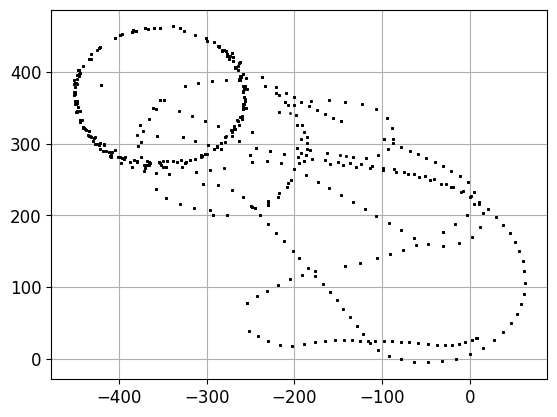

In [8]:
plt.plot(data_x, data_y, ".k", markersize=2)
plt.grid(True)

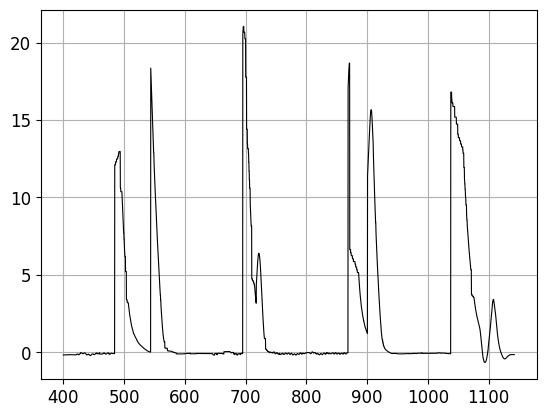

In [9]:
plt.plot(data_time, data_phi, "-k", markersize=2, lw=0.8)
plt.grid(True)

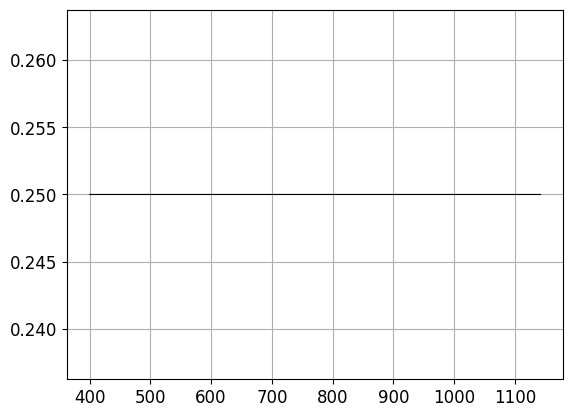

In [10]:
plt.plot(data_time, data_ke, "-k", markersize=2, lw=0.8)
plt.grid(True)

## Generate the article plots

### Experiment 1

In [4]:
class GVF_IK_exp1:
    def __init__(self, data, ke, t0_cond):
        # Procressing the data
        self.data_time = np.array(data["Time"].to_list())
        self.data_x = np.array(data["NAVIGATION:pos_x"].to_list())
        self.data_y = np.array(data["NAVIGATION:pos_y"].to_list())
        self.data_phi = np.array(data["GVF:phi"].to_list())
        self.data_omega_d = np.array(data["GVF:omega_d"].to_list())
        self.data_omega = np.array(data["GVF:omega"].to_list())
        self.data_n_norm = np.array(data["GVF:n_norm"].to_list())
        self.data_t_norm = np.array(data["GVF:t_norm"].to_list())

        self.ke = ke

        self.data_time = self.data_time - self.data_time[0]

        self.t0 = t0_cond
        self.phi0 = self.data_phi[self.data_time < self.t0][-1]

    def config_axis(self, ax, x_step, y_step, y_right=True):
        if y_right:
            ax.yaxis.tick_right()
        # ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.2f"))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(x_step))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_step/4))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(y_step))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_step/4))
        ax.grid(True)

    def plot(
            self, 
            dpi=100, 
            figsize=(14,8), 
            xlim=None, 
            ylim=None,
            plot_xy=False,
            ):
        fig = plt.figure(figsize=figsize, dpi=dpi)
        grid = plt.GridSpec(3, 4, hspace=0.2, wspace=0)
        ax = fig.add_subplot(grid[:, 0:2])
        axr1 = fig.add_subplot(grid[0, 2:4])
        axr2 = fig.add_subplot(grid[1, 2:4])
        axr3 = fig.add_subplot(grid[2, 2:4])

        ax.set_xlabel(r"$X$ [m]")
        ax.set_ylabel(r"$Y$  [m]")
        ax.set_aspect("equal")

        # Right axis configuration
        axr1.set_ylabel(r"$\phi$")
        self.config_axis(axr1, x_step=10, y_step=2)

        axr2.set_ylabel(r"[rad/s]")
        self.config_axis(axr2, x_step=10, y_step=0.2)

        axr3.set_ylabel(r"[m/s]")
        axr3.set_xlabel(r"$t$ [s]")
        self.config_axis(axr3, x_step=10, y_step=10)

        # Plot: 2D X-Y
        if plot_xy:
            ax.plot(self.data_x, self.data_y)
        else:
            if xlim is not None and ylim is not None:
                left, right = xlim
                bottom, top = ylim
                aspect = (right - left)/(top- bottom)
                ax.imshow(plt.imread(os.path.join(DATA_PATH, "exp1.png")), aspect=aspect, extent=(left, right, bottom, top))
            else:
                ax.imshow(plt.imread(os.path.join(DATA_PATH, "exp1.png")))
        
        # Plot: phi
        axr1.axhline(0, color="k", ls="-", lw=1)
        axr1.axvline(self.t0, color="k", ls="--", lw=0.8)

        exp_time = self.data_time[self.data_time > self.t0]
        exp_data = self.phi0*np.exp(-self.ke*(exp_time - self.t0))
        axr1.plot(self.data_time, self.data_phi, lw=1.5)
        axr1.plot(exp_time, exp_data, "--r", lw=1.5, label=r"$\phi_p(t)$")
        axr1.legend(fancybox=True, prop={"size": 12}, ncols=2)

        # Create the inset axis with manual position (zooming in)
        ax_inset = inset_axes(axr1, width="40%", height="40%", loc="upper center")
        ax_inset.set_ylabel(r"$\phi - \phi_p$")
        self.config_axis(ax_inset, x_step=20, y_step=0.2, y_right=True)
        ax_inset.set_xlim(self.t0, 100)
        ax_inset.set_ylim(-0.3, 0.1) 
        # mark_inset(axr1, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

        ax_inset.axhline(0, color="k", ls="-", lw=1)
        exp_phi = self.data_phi[self.data_time > self.t0]
        ax_inset.plot(exp_time, exp_phi - exp_data, lw=1.5)


        # Plot: omega plot
        axr2.axhline(0, color="k", ls="-", lw=1)
        axr2.axvline(self.t0, color="k", ls="--", lw=0.8)

        axr2.plot(self.data_time, self.data_omega_d, "r", lw=1.5, label=r"$\dot{\theta}_c(t)$")
        axr2.plot(self.data_time, self.data_omega, lw=1.5, label=r"$\omega(t)$")
        axr2.legend(fancybox=True, prop={"size": 12}, ncols=2)

        # Plot: tangent and normal norms of pd
        axr3.axhline(0, color="k", ls="-", lw=1)
        axr3.axvline(self.t0, color="k", ls="--", lw=0.8)

        axr3.plot(self.data_time, self.data_t_norm, "r", lw=1.5, label=r"$||v_T(t)||$")
        axr3.plot(self.data_time, self.data_n_norm, lw=1.5, label=r"$||v_C(t)||$")
        axr3.legend(fancybox=True, prop={"size": 12}, ncols=2)
        
        # -> Show the plot <-
        ax.grid(True)
        plt.show()

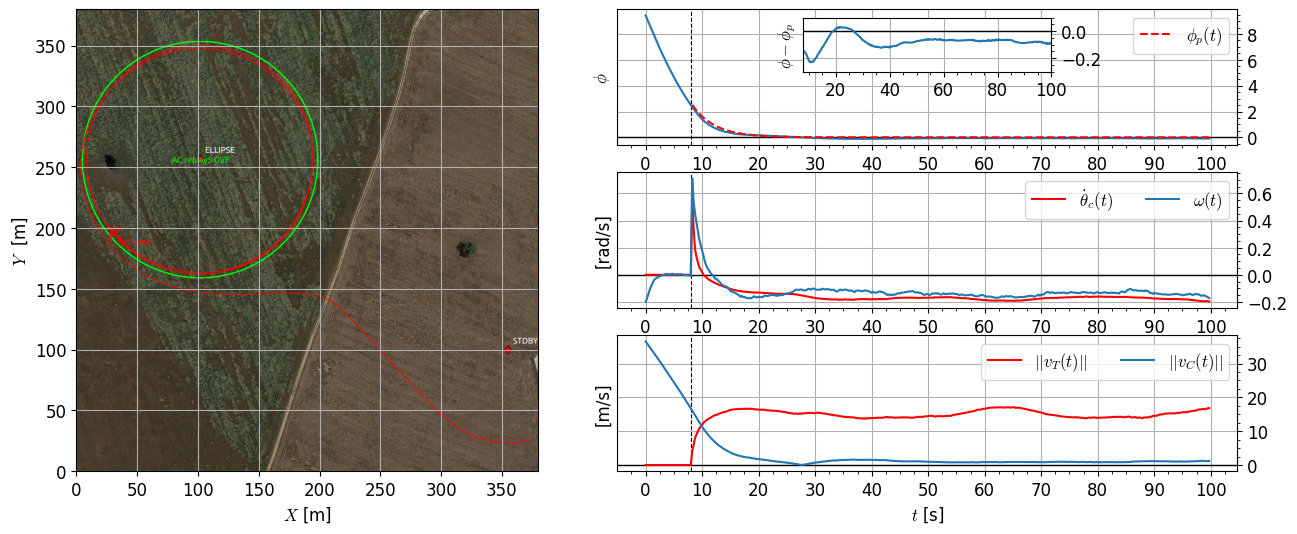

In [5]:
# Loading data
t0, tf, t0_cond, ke = 1600+88, 1600+88+100, 8, 0.25 # kn=0.6
# t0, tf, t0_cond, ke = 1600+280, 1600+280+100, 9, 0.20 # kn=0.6 -> 0.8
# t0, tf, t0_cond, ke = 1600+480, 1600+480+70, 0.01, 0.15 # kn=0.8

filename = "24_09_11__10_04_38.csv"

data = load_data(os.path.join(DATA_PATH, filename), t0, tf)

exp = GVF_IK_exp1(data, ke=ke, t0_cond=t0_cond)
exp.plot(dpi=100, figsize=(16,6), plot_xy=False, xlim=[0,380], ylim=[0,380])

# plt.savefig("output/exp1.png")
plt.show()

### Experiment 2

In [6]:
class GVF_IK_exp2:
    def __init__(self, data, A, omega, t0_sin):
        # Procressing the data
        self.data_time = np.array(data["Time"].to_list())
        self.data_x = np.array(data["NAVIGATION:pos_x"].to_list())
        self.data_y = np.array(data["NAVIGATION:pos_y"].to_list())
        self.data_phi = np.array(data["GVF:phi"].to_list())
        self.data_omega_d = np.array(data["GVF:omega_d"].to_list())
        self.data_omega = np.array(data["GVF:omega"].to_list())
        self.data_n_norm = np.array(data["GVF:n_norm"].to_list())
        self.data_t_norm = np.array(data["GVF:t_norm"].to_list())

        self.A = A
        self.omega = omega

        self.data_time = self.data_time - self.data_time[0]
        self.t0_sin = t0_sin
        
    def config_axis(self, ax, x_step, y_step, y_right=True):
        if y_right:
            ax.yaxis.tick_right()
        # ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.2f"))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(x_step))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_step/4))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(y_step))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_step/4))
        ax.grid(True)

    def plot(
            self, 
            dpi=100, 
            figsize=(14,8), 
            plot_xy=False,
            xlim=None, 
            ylim=None,
            ):
        fig = plt.figure(figsize=figsize, dpi=dpi)
        grid = plt.GridSpec(3, 4, hspace=0.2, wspace=0)
        ax = fig.add_subplot(grid[:, 0:2])
        axr1 = fig.add_subplot(grid[0, 2:4])
        axr2 = fig.add_subplot(grid[1, 2:4])
        axr3 = fig.add_subplot(grid[2, 2:4])

        # Axis configuration
        if xlim is not None:
            ax.set_xlim(xlim)
        if ylim is not None:
            ax.set_ylim(ylim)

        ax.set_xlabel(r"$X$ [m]")
        ax.set_ylabel(r"$Y$  [m]")
        ax.set_aspect("equal")

        # Right axis configuration
        axr1.set_ylabel(r"$\phi$")
        self.config_axis(axr1, x_step=10, y_step=0.1)

        axr2.set_ylabel(r"[rad/s]")
        self.config_axis(axr2, x_step=10, y_step=0.1)

        axr3.set_ylabel(r"[m/s]")
        axr3.set_xlabel(r"$t$ [s]")
        self.config_axis(axr3, x_step=10, y_step=5)

        # Plot: 2D X-Y
        if plot_xy:
            ax.plot(self.data_x, self.data_y)
        else:
            if xlim is not None and ylim is not None:
                left, right = xlim
                bottom, top = ylim
                aspect = (right - left)/(top- bottom)
                ax.imshow(plt.imread(os.path.join(DATA_PATH, "exp2.png")), aspect=aspect, extent=(left, right, bottom, top))
            else:
                ax.imshow(plt.imread(os.path.join(DATA_PATH, "exp2.png")))

        # Plot: phi
        axr1.axhline(0, color="k", ls="-", lw=1)
        axr1.axhline(self.A, color="k", ls="--", lw=0.8)
        axr1.axhline(-self.A, color="k", ls="--", lw=0.8)

        sin_time = self.data_time
        sin_data = self.A*np.sin(self.omega*(sin_time + self.t0_sin))
        axr1.plot(self.data_time, self.data_phi, lw=1.5)
        axr1.plot(sin_time, sin_data, "--r", lw=1.5, label=r"$\phi_d(t)$")
        axr1.legend(fancybox=True, prop={"size": 12}, ncols=2)


        # Plot: omega plot
        axr2.axhline(0, color="k", ls="-", lw=1)

        axr2.plot(self.data_time, self.data_omega_d, "r", lw=1.5, label=r"$\dot{\theta}_c(t)$")
        axr2.plot(self.data_time, self.data_omega, lw=1.5, label=r"$\omega(t)$")
        axr2.legend(fancybox=True, prop={"size": 12}, ncols=2)

        # Plot: tangent and normal norms of pd
        axr3.axhline(0, color="k", ls="-", lw=1)

        axr3.plot(self.data_time, self.data_t_norm, "r", lw=1.5, label=r"$||v_T(t)||$")
        axr3.plot(self.data_time, self.data_n_norm, lw=1.5, label=r"$||v_C(t)||$")
        axr3.legend(fancybox=True, prop={"size": 12}, ncols=2)
        
        # -> Show the plot <-
        ax.grid(True)
        plt.show()

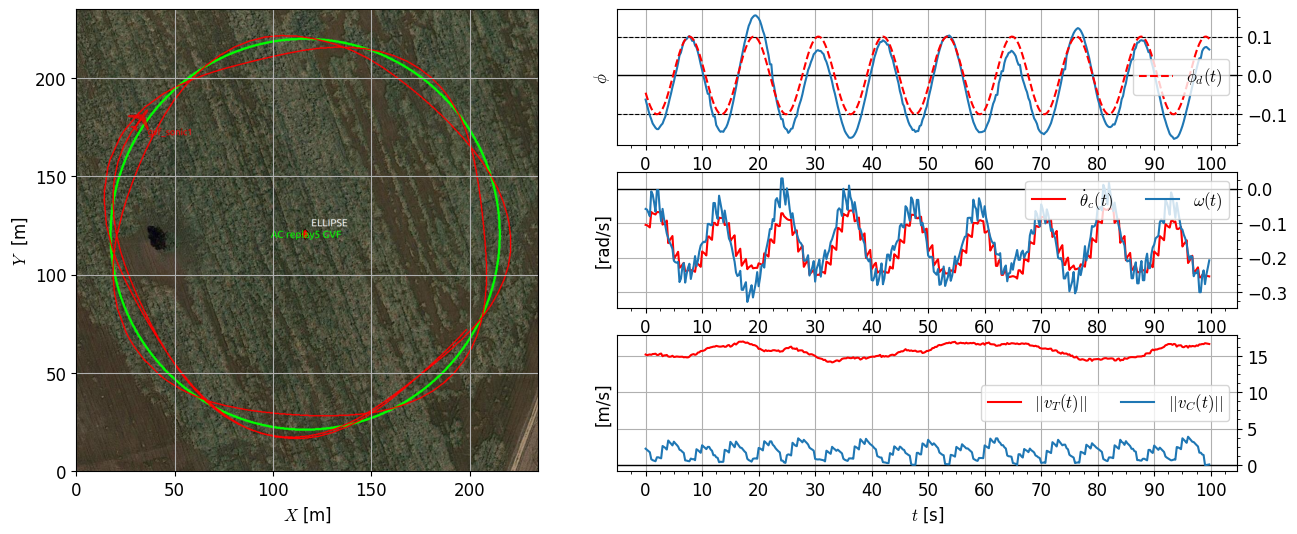

In [7]:
# Loading data
t0, tf, omega = 750, 1060, 0.55  # kn=0.8, ke=0.25
t0, tf, t0_sin, omega = 1150, 1200, 0.25, 0.45  # kn=0.8, ke=0.25
t0, tf, t0_sin, omega = 1250, 1350, 6.55, 0.55  # kn=0.8, ke=0.25

filename = "24_09_11__10_48_44.csv"

data = load_data(os.path.join(DATA_PATH, filename), t0, tf)

exp = GVF_IK_exp2(data, A=0.1, omega=omega, t0_sin=t0_sin)
exp.plot(dpi=100, figsize=(16,6), plot_xy=False, xlim=[0,235], ylim=[0,235])

# plt.savefig("output/exp2.png")
plt.show()

### Experiment 3

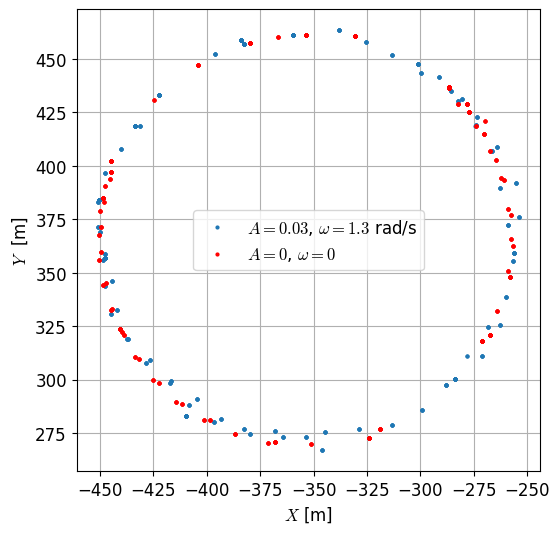

In [2]:
# Loading data
t0, tf = 740, 850
t0_classic, tf_classic = 940, 1050

filename = "24_09_13__11_45_32.csv"

data = load_data(os.path.join(DATA_PATH, filename), t0, tf)
data_classic = load_data(os.path.join(DATA_PATH, filename), t0_classic, tf_classic)

# Procressing the data
data_time = np.array(data["Time"].to_list())
data_x = np.array(data["NAVIGATION:pos_x"].to_list())
data_y = np.array(data["NAVIGATION:pos_y"].to_list())
data_phi = np.array(data["GVF:phi"].to_list())

data_time_classic = np.array(data_classic["Time"].to_list())
data_x_classic = np.array(data_classic["NAVIGATION:pos_x"].to_list())
data_y_classic = np.array(data_classic["NAVIGATION:pos_y"].to_list())
data_phi_classic = np.array(data_classic["GVF:phi"].to_list())

# Plot
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()

ax.set_xlabel("$X$ [m]")
ax.set_ylabel("$Y$  [m]")
ax.set_aspect("equal")

ax.plot(data_x, data_y, ".", markersize=4, label=r"$A = 0.03$, $\omega = 1.3$ rad/s")
ax.plot(data_x_classic, data_y_classic, ".r", markersize=4, label=r"$A = 0$, $\omega = 0$")
ax.grid(True)
ax.legend()

# plt.savefig("output/exp3.png")
plt.show()

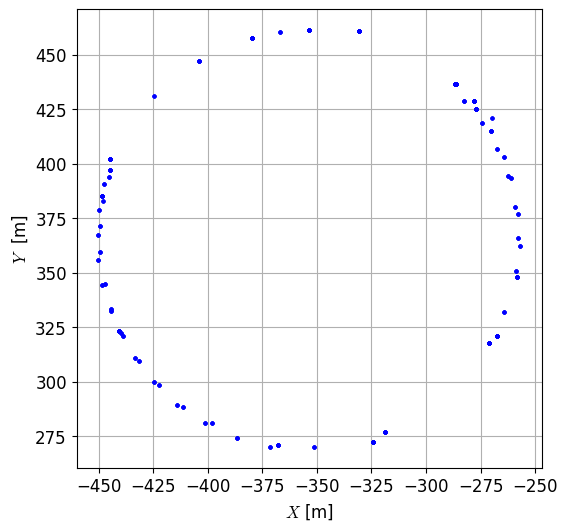

In [5]:
# Plot
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()

ax.set_xlabel("$X$ [m]")
ax.set_ylabel("$Y$  [m]")
ax.set_aspect("equal")

ax.plot(data_x_classic, data_y_classic, ".b", markersize=4, label=r"$A = 0$, $\omega = 0$")
ax.grid(True)

plt.show()

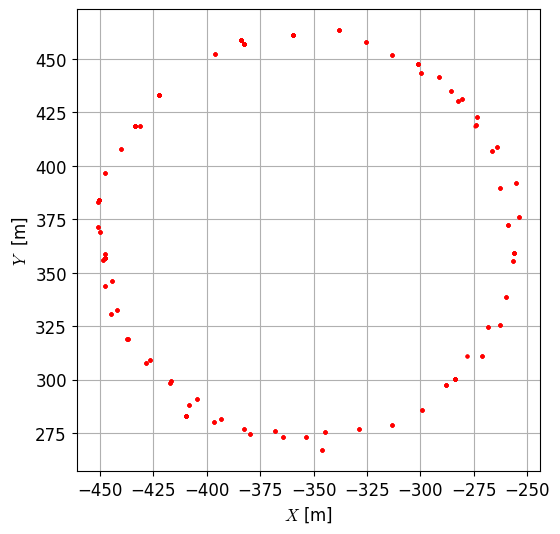

In [3]:
# Plot
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()

ax.set_xlabel("$X$ [m]")
ax.set_ylabel("$Y$  [m]")
ax.set_aspect("equal")

ax.plot(data_x, data_y, ".r", markersize=4)
ax.grid(True)

plt.show()